In [3]:
%pylab inline
from em_examples.HarmonicVMDCylWidget import HarmonicVMDCylWidget

Populating the interactive namespace from numpy and matplotlib


# Accuracy tests

In [4]:
from scipy.constants import mu_0
from SimPEG import EM

In [6]:
vmd = HarmonicVMDCylWidget()
sigma = np.logspace(-4, 0, 21)
z = 0.
rxOffset = 80.
frequency = np.logspace(2, 5, 31)
dpred = []
danal = []
for sig_temp in sigma:
    srcLoc = np.array([0., 0., z])
    rxLoc = np.array([[rxOffset, 0., z]])
    vmd.setThreeLayerParam(sig1=sig_temp, sig2=sig_temp, sig3=sig_temp)
    dpredtemp = vmd.simulate(srcLoc, rxLoc, frequency)
    dpredr = dpredtemp.reshape((2, frequency.size), order="F")[0,:]
    dpredi = dpredtemp.reshape((2, frequency.size), order="F")[1,:]
    dpred.append(dpredr+1j*dpredi)
    danal.append(EM.Analytics.hzAnalyticDipoleF(rxOffset, frequency, sig_temp) * mu_0)
dpred = np.hstack(dpred).reshape((len(frequency), len(sigma)), order="F")
danal = np.hstack(danal).reshape((len(frequency), len(sigma)), order="F")

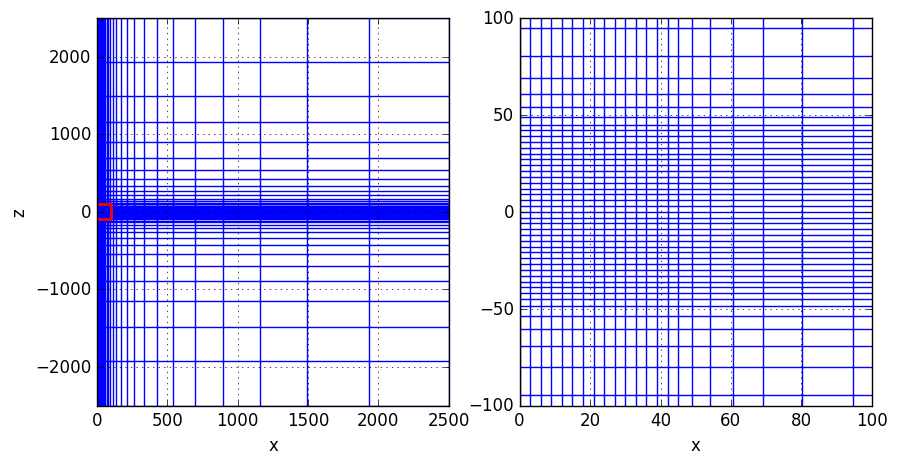

In [11]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

vmd.mesh.plotGrid(ax=ax1)
ax1.plot(np.r_[0, 100, 100, 0], np.r_[-100, -100, 100, 100], 'r-', lw=2)
ax1.set_xlim(0, vmd.mesh.vectorNx.max())
ax1.set_ylim(vmd.mesh.vectorNz.min(), vmd.mesh.vectorNz.max())
vmd.mesh.plotGrid(ax=ax2)
ax2.set_xlim(0, 100)
ax2.set_ylim(-100, 100)
ax2.set_ylabel("")

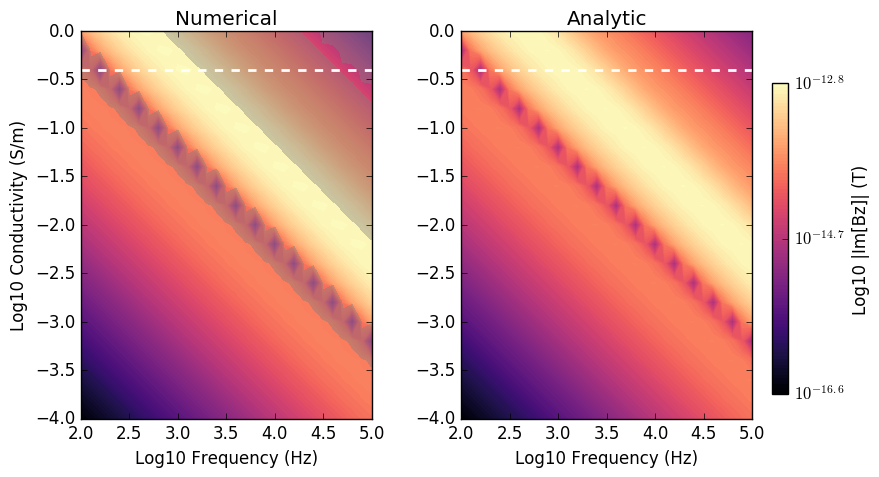

In [7]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
isig=18
out = ax1.contourf(np.log10(frequency), np.log10(sigma), np.log10(abs(dpred.imag)).T, 100, cmap="magma")
ax2.contourf(np.log10(frequency), np.log10(sigma), np.log10(abs(danal.imag)).T, 100, vmin=out.vmin, vmax=out.vmax, cmap="magma")
ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')
ax1.set_xlabel("Log10 Frequency (Hz)")
ax1.set_ylabel("Log10 Conductivity (S/m)")
ax2.set_xlabel("Log10 Frequency (Hz)")
ax1.plot(np.log10(frequency), np.log10(sigma[isig])*np.ones_like(frequency), 'w--', lw=2)
ax2.plot(np.log10(frequency), np.log10(sigma[isig])*np.ones_like(frequency), 'w--', lw=2)
eps = 1e-16
err = abs((dpred.imag-danal.imag) / (abs(danal.imag)+eps))
ax1.contourf(np.log10(frequency), np.log10(sigma), err.T, 100, levels=[0.05, 1.], colors="grey", alpha=0.4)
pos =  ax2.get_position()
cbarax = fig.add_axes([pos.x0 + 0.36 , pos.y0 + 0.05,  pos.width*0.05, pos.height*0.8]) 
cb = plt.colorbar(out, ax=ax2, cax=cbarax, ticks=np.linspace(out.vmin, out.vmax, 3), format="$10^{%.1f}$")
cb.set_label("Log10 |Im[Bz]| (T)")
ax1.set_title("Numerical")
ax2.set_title("Analytic")

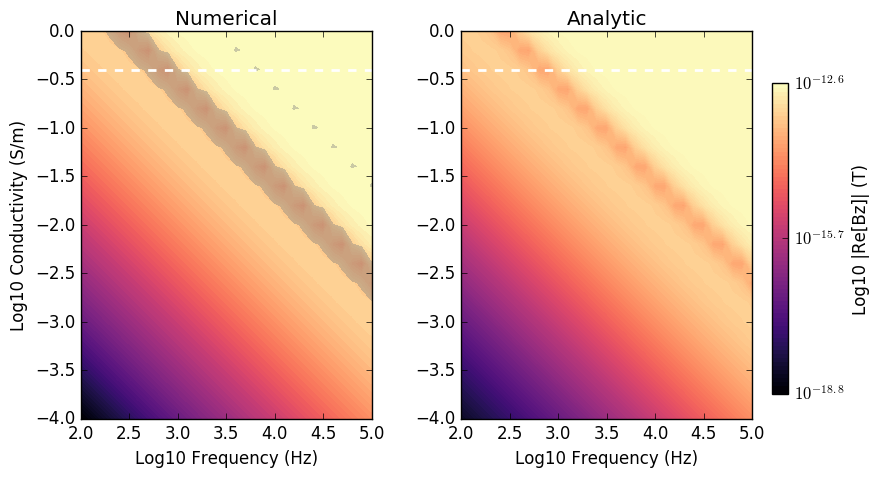

In [9]:
fig = plt.figure(figsize=(9,5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
out = ax1.contourf(np.log10(frequency), np.log10(sigma), np.log10(abs(dpred.real)).T, 100, cmap="magma")
ax2.contourf(np.log10(frequency), np.log10(sigma), np.log10(abs(danal.real)).T, 100, vmin=out.vmin, vmax=out.vmax, cmap="magma")
ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')
ax1.set_xlabel("Log10 Frequency (Hz)")
ax1.set_ylabel("Log10 Conductivity (S/m)")
ax2.set_xlabel("Log10 Frequency (Hz)")
ax1.plot(np.log10(frequency), np.log10(sigma[isig])*np.ones_like(frequency), 'w--', lw=2)
ax2.plot(np.log10(frequency), np.log10(sigma[isig])*np.ones_like(frequency), 'w--', lw=2)
eps = 1e-16
err = abs((dpred.real-danal.real) / (abs(danal.real)+eps))
ax1.contourf(np.log10(frequency), np.log10(sigma), err.T, 100, levels=[0.05, 1.], colors="grey", alpha=0.4)
pos =  ax2.get_position()
cbarax = fig.add_axes([pos.x0 + 0.36 , pos.y0 + 0.05,  pos.width*0.05, pos.height*0.8]) 
cb = plt.colorbar(out, ax=ax2, cax=cbarax, ticks=np.linspace(out.vmin, out.vmax, 3), format="$10^{%.1f}$")
cb.set_label("Log10 |Re[Bz]| (T)")
ax1.set_title("Numerical")
ax2.set_title("Analytic")

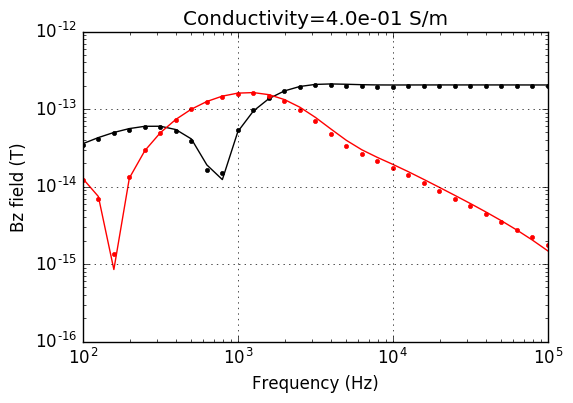

In [10]:
# isig=20
plt.loglog(frequency,abs(dpred.real[:,isig]), 'k')
plt.loglog(frequency,abs(danal.real[:,isig]), 'k.')
plt.loglog(frequency,abs(dpred.imag[:,isig]), 'r')
plt.loglog(frequency,abs(danal.imag[:,isig]), 'r.')
plt.xlabel("Frequency (Hz)")
plt.ylabel("Bz field (T)")
plt.title(("Conductivity=%.1e S/m")%(sigma[isig]))
plt.grid(True)